# Tutorial 4: Cleaning Survey Data
**Date**: Feb 2022

**Background**

In the last two tutorials you learned how to develop questionnaires for particular case studies: tolerance, happiness and climate change. You also learned how to reduce bias in question design, questionnaire design and administration of questionnaire. 

Now we will focus on a case-study to measure tolerance and follow the various steps needed to analyze a questionnaire in Python. 


**Case-Study**

A group of researchers are looking to explore tolerance as an orientation towards difference. They define tolerance as a value orientation towards difference. They developed a questionnaire focusing on the three different expressions of tolerance [1]:


<p align=\"center\"><img src='./images/items.PNG' width="1000" /></p>

They used this questionnaire to assess the tolerance for a sample of 150 university students. The responses to the questionnaire items were recorded in a Comma Separated Value (CSV) file. In addition to this, the researchers also included questions about general socio-demographics and past experiences.

**Data**


Here is a description of the variables in the dataset (`tolerance_survey_data.csv` file):

|id|variable   |description                                                                                                                                                     |
|------|-----------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1     |id         |annoymized unique identifier per individual                                                                                                                                                       |
|2     |age        |Age of student                                                                                                                                                                                                          |
|3     |height     |Height (scale in cm, e.g. 183)                                                                                                                                  |
|4     |country    |Where are you come from? (Country)                                                                                                                              |
|5     |language   |How many language you speak at home to your family?                                                                                                             |
|6     |freq_travel|How many different countries have you lived in?                                                                                                                                                                   |
|7     |q1         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [People should have the right to live how they wish]|
|8    |q2         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [It is important that people have the freedom to live their life as they choose]     |
|9   |q3         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [ It is okay for people to live as they wish as long as they do not harm other people]                                    |
|10    |q4         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s beliefs and opinions]        |
|11    |q5         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s opinions even when I do not agree]   |
|12    |q6         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like to spend time with people who are different from me]                                         |
|13    |q7         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like people who challenge me to think about the world in a different way]                            |
|14   |q8         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [Society benefits from a diversity of traditions and lifestyles]                            |
                 |


**Overview of the Next 3 Tutorials**

We will follow three major steps to analyze a questionnaire in Python:

1.	**Data Cleaning (Tutorial 4)**: Before processing the data recorded from the respondents answers it is imperative to understand the data types related to questionnaire items. It might be necessary to transform data from one measurement scale to another for quantitative processing. There might be missing values in the data. Appropriate measures should be taken to handle the missing values.


2.	**Reliability and Validity (Tutorial 5)**: Assessment of the internal consistency of the survey items. The coefficient of internal consistency provides an estimate of the reliability of the measurement and is based on the assumption that items measuring the same construct should correlate.


3.	**Factor Analysis (Tutorial 6)**: A multivariate statistical procedure that reduces a large number of observed variables into a smaller set of variables (factors). The underlying variables, factors can explain the interrelationships among the observed variables.


<br>
<br>


**Today's Objectives**

**In today’s tutorial on Cleaning Survey Data, you will:**

**i)	Import the survey data into pandas**

**ii)	Analyze the datatypes**

**iii)Transform the data for quantitative processing**

**iv)	Handle missing values**





[1] Hjerm, M., Eger, M. A., Bohman, A., & Fors Connolly, F. (2020). A new approach to the study of tolerance: Conceptualizing and measuring acceptance, respect, and appreciation of difference. Social Indicators Research, 147(3), 897-919.
Chicago	




## 1. Setup Library

Import the necessary libraries you will need to clean and pre-process the survey data.

In [1]:
import pandas as pd

## 2. Import Data 

For this tutorial, we will be using the **cleaned version** of "tolerance survey dataset". 
The csv file that we will be using `tolerance_survey_data.csv` is available at https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/inputs/tolerance_survey_data.csv 

Import this file in pandas using the `read_csv()` function.

In [6]:
#read the data into the dataframe and print the first 10 rows

url = 'https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/inputs/tolerance_survey_data.csv'
df = pd.read_csv(url)
df.head(10)

,id,age,height,country,language,freq_travel,q1,q2,q3,q4,q5,q6,q7,q8
0,1,34.0,186,Spain,1.0,5.0,Agree,Agree,Agree,Agree,Neutral,Disagree,Neutral,Neutral
1,2,34.0,157,BR,2.0,3.0,Strongly Agree,Agree,Neutral,Agree,Strongly Agree,Strongly Agree,Agree,Agree
2,3,27.0,191,RU,4.0,2.0,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Agree
3,4,35.0,165,RU,3.0,5.0,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Neutral
4,5,34.0,164,ID,5.0,5.0,Strongly Agree,Agree,Strongly Agree,Neutral,Neutral,Agree,Agree,Strongly Agree
5,6,NaN,165,ID,3.0,3.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
6,8,32.0,222,ID,3.0,5.0,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree
7,9,39.0,173,CN,4.0,5.0,Agree,Disagree,Strongly Disagree,Neutral,Strongly Disagree,Neutral,Disagree,Agree
8,10,29.0,177,AL,2.0,1.0,NaN,Agree,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Neutral
9,11,19.0,159,NI,2.0,4.0,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree


## 3. Basic data understanding

In [ ]:
# check how many variables and observations are in the dataset

In [7]:
print("The shape of the dataframe is",df.shape) 

The shape of the dataframe is (150, 14)


In [8]:
#print the age and height from the 2nd participant (hint: index should be 1)

In [9]:
print(df.iloc[1][1:3])

age        34
height    157
Name: 1, dtype: object


In case you don't know much about the survey data that is being analyzed, you can always check the scale of all the columns by looking for the `min`, `max`, and `unique value counts`. This will let you know if you need to rescale the data or not.

## 4. Identify data types

How would you identify the data types of variables in the survey?

- Are they categorical or numerical?
- how to deal with different types of variables, - for example: `age, height, q1` ?
- why they matter? 

In [10]:
# Check the data type of each variable
df.dtypes

id               int64
age            float64
height           int64
country         object
language       float64
freq_travel    float64
q1              object
q2              object
q3              object
q4              object
q5              object
q6              object
q7              object
q8              object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           150 non-null    int64  
 1   age          137 non-null    float64
 2   height       150 non-null    int64  
 3   country      150 non-null    object 
 4   language     143 non-null    float64
 5   freq_travel  143 non-null    float64
 6   q1           149 non-null    object 
 7   q2           150 non-null    object 
 8   q3           149 non-null    object 
 9   q4           149 non-null    object 
 10  q5           150 non-null    object 
 11  q6           149 non-null    object 
 12  q7           149 non-null    object 
 13  q8           149 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.5+ KB


> Thinking: CHECK Variables 
> - **Height**: int64?
> - **Age**: float64?
> - **q1**: object

## 5. Analyzing Likert Scale survey questions

In [ ]:
# how many participants disagree with q1 and q2 questions? Look for value_counts() at pandas documentation: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [12]:
df['q1']. value_counts()

Strongly Agree       53
Agree                49
Neutral              20
Disagree             18
Strongly Disagree     9
Name: q1, dtype: int64

In [ ]:
# convert the previous numbers into percentage

In [13]:
df['q1']. value_counts(normalize = True)

Strongly Agree       0.355705
Agree                0.328859
Neutral              0.134228
Disagree             0.120805
Strongly Disagree    0.060403
Name: q1, dtype: float64

## 6. Visualizing all survey questions

In [ ]:
# plot/visualise categorical variable such as q4
# you may refer to this old notebook you already solved in the first year: https://nbviewer.org/github/MaastrichtU-IDS/global-studies/blob/main/semester2/notebooks/4.1-data-visualization.ipynb

<AxesSubplot:>

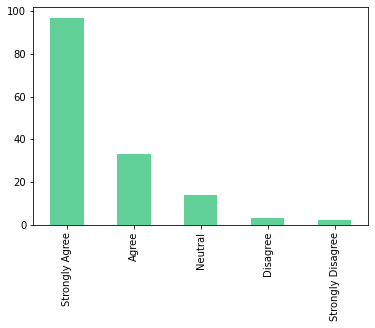

In [14]:
df['q4'].value_counts().plot(kind = "bar",color = "#61d199") 

---
## 7. Transform/Prepare the data


Convert the exisiting scale of questionnaire items into numerical Likert Scale

> why? 

We need to map likert scale options _(i.e.strongly agree)_ to numbers _(i.e. 5) as following:

Strongly Agree ---> 5

Agree ---> 4

Neutral ---> 3

Disagree ---> 2

Strongly Disagree ---> 1


In [15]:
df_transformed = df.replace(['Strongly Agree',
                   'Agree', 
                   'Neutral', 
                   'Disagree', 
                   'Strongly Disagree'], [5,4,3,2,1])
df_transformed.tail(5)

,id,age,height,country,language,freq_travel,q1,q2,q3,q4,q5,q6,q7,q8
145,172,21.0,175,RU,1.0,4.0,3.0,3,4.0,5.0,4,5.0,4.0,4.0
146,173,40.0,163,CN,1.0,1.0,5.0,5,5.0,5.0,5,5.0,5.0,5.0
147,174,NaN,182,AR,2.0,3.0,4.0,4,4.0,5.0,4,4.0,4.0,5.0
148,176,35.0,160,PH,1.0,3.0,5.0,4,5.0,5.0,3,4.0,4.0,5.0
149,177,NaN,160,CN,5.0,2.0,1.0,5,3.0,5.0,5,5.0,5.0,5.0


As you can see, the data set has already been converted to numbers. But double check the data types with `dtypes`. 

In [16]:
df_transformed.dtypes

id               int64
age            float64
height           int64
country         object
language       float64
freq_travel    float64
q1             float64
q2               int64
q3             float64
q4             float64
q5               int64
q6             float64
q7             float64
q8             float64
dtype: object

## 8. Missing Values in the Dataset

We explore the missing values with heatmaps. Look at the following code and explain what it does before running

Text(0.5, 1.0, 'Missing values in the dataset')

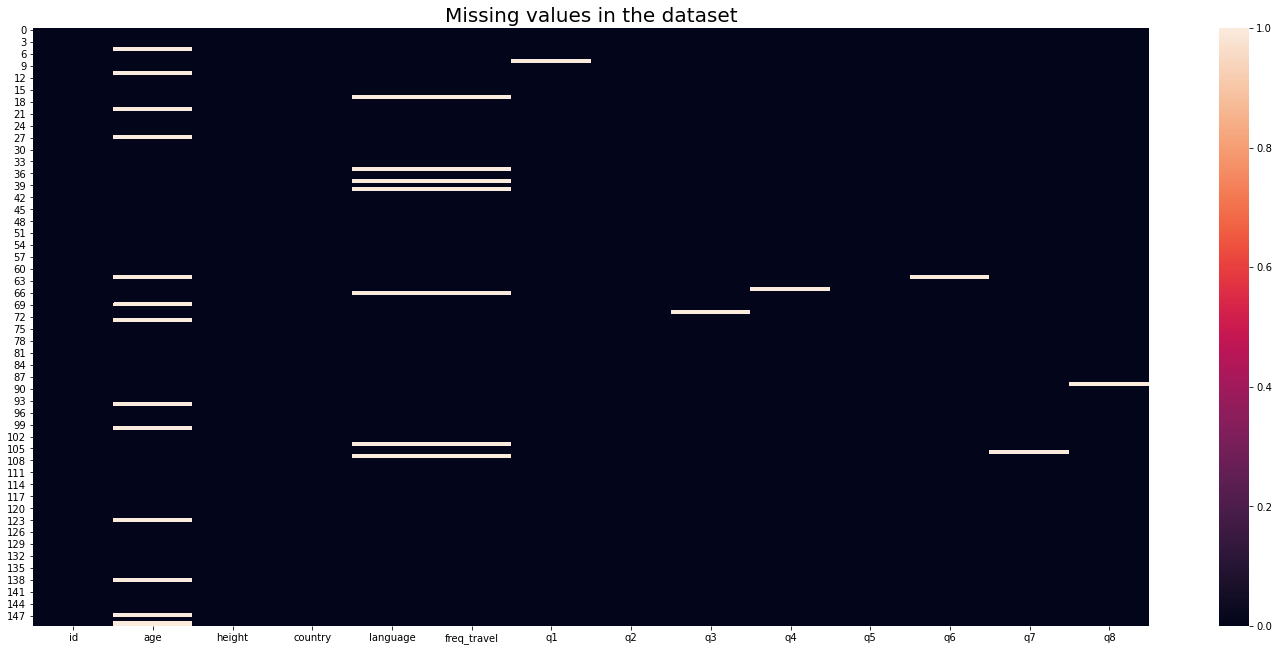

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
names = df_transformed.columns
plt.figure(figsize = (25,11))
sns.heatmap(df_transformed.isna().values, xticklabels=df_transformed.columns)
plt.title("Missing values in the dataset", size=20)

In [ ]:
#Now try to identify the rows in the dataframe which contain missing values (NaN) 

In [18]:
df[df.isnull().any(axis=1)]

,id,age,height,country,language,freq_travel,q1,q2,q3,q4,q5,q6,q7,q8
5,6,NaN,165,ID,3.0,3.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
8,10,29.0,177,AL,2.0,1.0,NaN,Agree,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Neutral
11,14,NaN,179,ID,3.0,1.0,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
17,21,33.0,154,RU,NaN,NaN,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
20,24,NaN,175,FR,1.0,1.0,Strongly Agree,Strongly Agree,Agree,Agree,Disagree,Agree,Strongly Agree,Strongly Agree
27,33,NaN,158,SE,1.0,5.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree
35,43,25.0,176,NL,NaN,NaN,Neutral,Neutral,Neutral,Neutral,Strongly Agree,Disagree,Disagree,Agree
38,46,25.0,163,BG,NaN,NaN,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
40,50,35.0,190,CN,NaN,NaN,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree
62,75,NaN,186,LK,5.0,5.0,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,NaN,Strongly Agree,Strongly Agree


The main questionnarie items of interest are our survey items: q1, q2,...... q8. So we will drop rest of the columns.

In [ ]:
#drop the columns: id, age, height, country, language, freq_travel

In [19]:
df_transformed = df_transformed.drop(['id','age','height','country','language','freq_travel'], axis=1)
df_transformed

,q1,q2,q3,q4,q5,q6,q7,q8
0,4.0,4,4.0,4.0,3,2.0,3.0,3.0
1,5.0,4,3.0,4.0,5,5.0,4.0,4.0
2,4.0,4,5.0,4.0,5,4.0,5.0,4.0
3,4.0,4,4.0,4.0,5,4.0,4.0,3.0
4,5.0,4,5.0,3.0,3,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
145,3.0,3,4.0,5.0,4,5.0,4.0,4.0
146,5.0,5,5.0,5.0,5,5.0,5.0,5.0
147,4.0,4,4.0,5.0,4,4.0,4.0,5.0
148,5.0,4,5.0,5.0,3,4.0,4.0,5.0


In [ ]:
#Replace the missing value (NaN) with the mean of that column.

In [20]:
#Compute the means of each colum 
#Hint use the mean() funtion on the dataframe
column_means = df_transformed.mean()
column_means

q1    3.798658
q2    4.046667
q3    4.073826
q4    4.476510
q5    4.313333
q6    4.268456
q7    4.060403
q8    4.120805
dtype: float64

In [21]:
#Use the fillna() function to fill the missing (NaN) value with the mean
df_transformed_without_NaN = df_transformed.fillna(column_means)
df_transformed_without_NaN

,q1,q2,q3,q4,q5,q6,q7,q8
0,4.0,4,4.0,4.0,3,2.0,3.0,3.0
1,5.0,4,3.0,4.0,5,5.0,4.0,4.0
2,4.0,4,5.0,4.0,5,4.0,5.0,4.0
3,4.0,4,4.0,4.0,5,4.0,4.0,3.0
4,5.0,4,5.0,3.0,3,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
145,3.0,3,4.0,5.0,4,5.0,4.0,4.0
146,5.0,5,5.0,5.0,5,5.0,5.0,5.0
147,4.0,4,4.0,5.0,4,4.0,4.0,5.0
148,5.0,4,5.0,5.0,3,4.0,4.0,5.0


In [ ]:
#Check the rows where the missing value has been replaced by the mean

In [22]:
df_transformed_without_NaN[df_transformed_without_NaN.isnull().any(axis=1)]

,q1,q2,q3,q4,q5,q6,q7,q8


In [ ]:
#Another way to address the missing values is to drop the rows with missing values from the DataFrame. 
#How will you do that ?

In [23]:
df_transformed.dropna(inplace=True)

In [ ]:
#Check how many rows remain after dropping the rows with missing (NaN) values.

In [24]:
len(df_transformed)

144

Which of the following is a better strategy:

i) Drop the rows with missing values or

ii) Replace the missing values by mean or mode. 

Justify your answer.